In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sym

In [2]:
def f(y,x):
    

    
    dydt =  x + 2*y
 
    
    return dydt

In [36]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]
    
    y = np.zeros_like(t)
   
    
    y[0] = r0
  
    # RungeKutta4
    for i in range(0,4):
        present = y[i]
        K11 = f(present,t[i])
        K12 = f(present+0.5*K11*h,t[i]+0.5h)
        K13 = f(present+0.5*K12*h,t[i]+0.5*h)
        K14 = f(present+K13*h,t[i]+h)
    
        y[i+1] = y[i] + h*(K11+2*K12+2*K13+K14)/6
      
        
    yc = y.copy()
  
    
    for i in range(5,len(t)):
        
        # Bashforth
        
        present = y[i-1]
        past = y[i-2]
        past2 = y[i-3]
        past3 = y[i-4]
        past4 = y[i-5]
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        K13 = f(past2,t[i-3])
        K14 = f(past3,t[i-4])
        K15 = f(past4,t[i-5])
        
        y[i] = y[i-1] + h*((1901/720)*K11 - (2774/720)*K12 + (2616/720)*K13 -(1274/720)*K14 + (251/720)*K15)
       
        # Moulton
        futuro = y[i]
        KF = f(futuro,t[i])
        
        yc[i] = yc[i-1] + h*((475/1440)*KF + (1427/1440)*K11- (798/1440)*K12 + (482/1440)*K13 - (173/1440)*K14 + (27/1440)*K15)
        
    
    return yc

Los Puntos $n=1,2,3,4$ se encontraron con Runge-Kutta de orden 4

In [37]:
y0=0
x=np.linspace(0.,4.,100)
sol_num = IntegratorAdams(f,y0,x)


In [43]:
def sol(x):
    
    return -0.5*x - ((1-np.exp(2*x))/4)

In [44]:
Exact=sol(x)

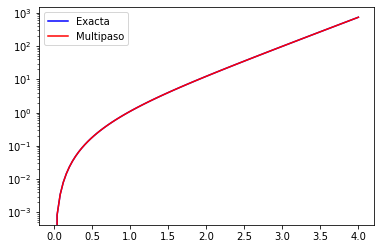

In [54]:
fig=plt.figure()
ax=fig.add_subplot()
plt.yscale("log")
ax.plot(x,Exact,c="b",label="Exacta")
ax.plot(x,sol_num,c="r",label="Multipaso")
plt.legend()

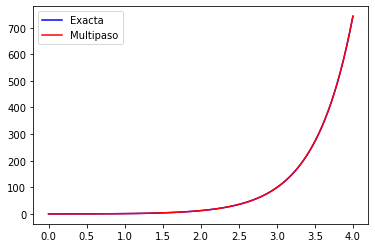

In [55]:
plt.plot(x,Exact,c="b",label="Exacta")
plt.plot(x,sol_num,c="r",label="Multipaso")
plt.legend()

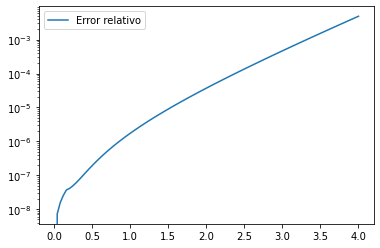

In [53]:
plt.plot(x,np.abs(Exact-sol_num),label="Error relativo")
plt.yscale("log")
plt.legend()